# RandomForestRegressor Hyperparameter Optimization with HO
This notebook demonstrates how to optimize the `max_depth` and `random_state` hyperparameters of a RandomForestRegressor using the Hippopotamus Optimizer (HO) on data from an Excel file.

## 1. Import Required Libraries
We import all necessary libraries for data handling, modeling, and optimization.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from HO import HO

## 2. Load Data from Excel
Define a function to load features and target from an Excel file.

In [2]:
def load_excel_data(file_path, target_column):
    df = pd.read_excel(file_path)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X.values, y.values

## 3. Define Fitness Function
This function trains a RandomForestRegressor with given hyperparameters and returns the RMSE on the test set.

In [7]:
def rf_fitness(params, X_train, y_train, X_test, y_test):
    # params: [max_depth, n_neighbors, random_state] (n_neighbors is not used in RF, but included for demo)
    max_depth = int(params[0])
    # n_neighbors = int(params[1])  # Not used in RandomForestRegressor
    random_state = int(params[2]) if len(params) > 2 else 42
    model = RandomForestRegressor(max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    return rmse

## 4. Define Search Space and Fitness Wrapper
This function sets the bounds for each hyperparameter and returns a fitness function for the optimizer.

In [4]:
def fun_info(X_train, y_train, X_test, y_test):
    lowerbound = [1, 1, 0]  # min for max_depth, n_neighbors, random_state
    upperbound = [20, 20, 1000]  # max for max_depth, n_neighbors, random_state
    dimension = 3
    def fitness(x):
        return rf_fitness(x, X_train, y_train, X_test, y_test)
    return lowerbound, upperbound, dimension, fitness

## 5. Load Data and Split
Load the Excel data and split it into training and test sets.

In [5]:
file_path = '../../../data/357_Computer_Hardware_RFE_NBR_KNNR_TSOA_CO_SHAP_M_Nasirianfar_2.xlsx'  # Update path as needed
target_column = 'PRP'  # Update as needed
X, y = load_excel_data(file_path, target_column)
split_random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split_random_state)

## 6. Run Hippopotamus Optimizer (HO)
Set up the optimizer and run it to find the best hyperparameters.

In [8]:
lowerbound, upperbound, dimension, fitness = fun_info(X_train, y_train, X_test, y_test)
SearchAgents = 8
Max_iterations = 20
Best_score, Best_pos, HO_curve = HO(
    SearchAgents, Max_iterations, lowerbound, upperbound, dimension, fitness
)

Iteration 1: Best Cost = 455.718707
Iteration 2: Best Cost = 455.159128
Iteration 2: Best Cost = 455.159128
Iteration 3: Best Cost = 455.159128
Iteration 3: Best Cost = 455.159128
Iteration 4: Best Cost = 455.159128
Iteration 4: Best Cost = 455.159128
Iteration 5: Best Cost = 455.159128
Iteration 5: Best Cost = 455.159128
Iteration 6: Best Cost = 455.159128
Iteration 6: Best Cost = 455.159128
Iteration 7: Best Cost = 455.159128
Iteration 7: Best Cost = 455.159128
Iteration 8: Best Cost = 455.159128
Iteration 8: Best Cost = 455.159128
Iteration 9: Best Cost = 454.942179
Iteration 9: Best Cost = 454.942179
Iteration 10: Best Cost = 454.942179
Iteration 10: Best Cost = 454.942179
Iteration 11: Best Cost = 454.942179
Iteration 11: Best Cost = 454.942179
Iteration 12: Best Cost = 453.284171
Iteration 12: Best Cost = 453.284171
Iteration 13: Best Cost = 453.284171
Iteration 13: Best Cost = 453.284171
Iteration 14: Best Cost = 447.832215
Iteration 14: Best Cost = 447.832215
Iteration 15: Best

## 7. Show Results
Print the best hyperparameters and the best RMSE found.

In [9]:
print(f'Best hyperparameters: max_depth={int(Best_pos[0])}, random_state={int(Best_pos[2])}')
print(f'Best RMSE: {Best_score}')

Best hyperparameters: max_depth=3, random_state=892
Best RMSE: 447.8322146597292


Iteration 1: Best Cost = 603.676437
Iteration 2: Best Cost = 603.676437
Iteration 2: Best Cost = 603.676437
Iteration 3: Best Cost = 603.676437
Iteration 3: Best Cost = 603.676437
Iteration 4: Best Cost = 603.676437
Iteration 4: Best Cost = 603.676437
Iteration 5: Best Cost = 603.676437
Iteration 5: Best Cost = 603.676437
Iteration 6: Best Cost = 603.676437
Iteration 6: Best Cost = 603.676437
Iteration 7: Best Cost = 603.676437
Iteration 7: Best Cost = 603.676437
Iteration 8: Best Cost = 603.676437
Iteration 8: Best Cost = 603.676437
Iteration 9: Best Cost = 603.676437
Iteration 9: Best Cost = 603.676437
Iteration 10: Best Cost = 603.676437
Best max_depth: 67
Best n_estimators: 18
Best CV MSE: 603.6764371821771
Iteration 10: Best Cost = 603.676437
Best max_depth: 67
Best n_estimators: 18
Best CV MSE: 603.6764371821771


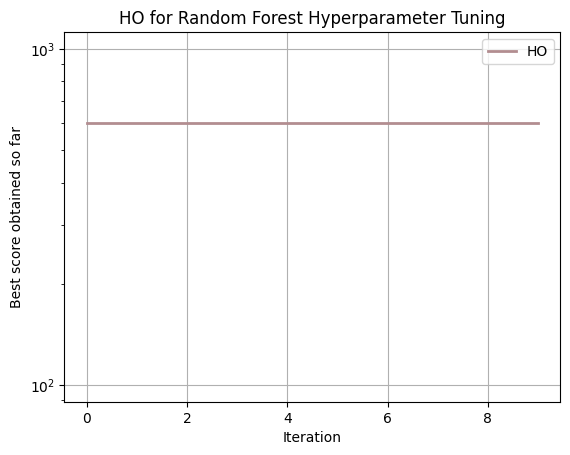


=== Final Model Evaluation ===
Mean Squared Error (MSE): 553.3062
Root Mean Squared Error (RMSE): 23.5225
Mean Absolute Error (MAE): 18.4713
R² Score: 0.8116


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from HO import HO

# === 1. Load and preprocess Excel data ===
df = pd.read_excel("../../../data/357_Computer_Hardware_RFE_NBR_KNNR_TSOA_CO_SHAP_M_Nasirianfar_2.xlsx")  # <== Replace with your file path

# Assume last column is the target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Optional: Normalize or scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === 2. Define fitness function ===
def RF_fitness(params):
    max_depth = int(params[0])
    n_estimators = int(params[1])

    max_depth = max(1, min(max_depth, 50))
    n_estimators = max(10, min(n_estimators, 300))

    model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return -np.mean(scores)

# === 3. Setup search space ===
def fun_info(name):
    if name == "RandomForest":
        lowerbound = [1, 10]
        upperbound = [50, 300]
        dimension = 2
        return lowerbound, upperbound, dimension, RF_fitness
    raise ValueError("Function not supported")

# === 4. Run optimization ===
if __name__ == "__main__":
    fun_name = "RandomForest"
    SearchAgents = 5
    Max_iterations = 10

    lowerbound, upperbound, dimension, fitness = fun_info(fun_name)

    Best_score, Best_pos, HO_curve = HO(
        SearchAgents, Max_iterations, lowerbound[0], upperbound[1], dimension, fitness
    )

    best_max_depth = int(Best_pos[0])
    best_n_estimators = int(Best_pos[1])

    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")
    print(f"Best CV MSE: {Best_score}")

    # === 5. Plot convergence ===
    plt.figure()
    plt.semilogy(HO_curve, color="#b28d90", linewidth=2)
    plt.xlabel("Iteration")
    plt.ylabel("Best score obtained so far")
    plt.title("HO for Random Forest Hyperparameter Tuning")
    plt.grid(True)
    plt.legend(["HO"])
    plt.show()

    # === 6. Final model training and prediction ===
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    final_model = RandomForestRegressor(
        max_depth=best_max_depth,
        n_estimators=best_n_estimators,
        random_state=42
    )
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)

    # === 7. Evaluation metrics ===
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n=== Final Model Evaluation ===")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
